In [1]:
import PIL.ImageGrab
import pyautogui
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
points = {"Wizard":(770,680),
            "Heli" : (580,520),
            "Home" : (830,820),
            "Restart1" : (1085,810),
            "Restart2" : (1130,720),
            "ClearMonkey" : (1750,820),
            "CleanClick" : (600,100),
            "HeliStay" : (410,400),
            "Start" : (1815,1005),
            "Upgrade1" : (1480,490),
            "Upgrade2" : (1480,635),
            "Upgrade3" : (1480,780),
         }
keys = {"Wizard":'a',
         "Heli" : 'b',
        "Upgrade1" : ",",
        "Upgrade2" : ".",
        "Upgrade3" : "/",
        "Clear" : "Esc",
        "Start" : "space",
         }

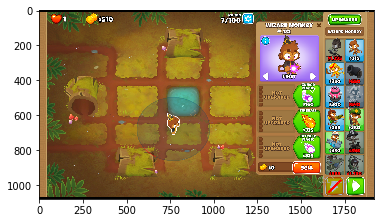

(1080, 1920, 3)


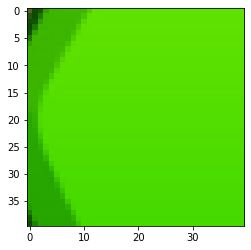

213.930625


In [20]:
def getSnap(debug=False):
    im = PIL.ImageGrab.grab()
    if (debug):
        img = np.array(im)
        plt.imshow(img)
        plt.show()
    print(img.shape)
    return np.array(im)

def getSquare(point,width = 100,height=100,debug=False):
    centerX,centerY = point
    im = PIL.ImageGrab.grab()
    img = np.array(im)
    img = img[(centerY-height):(centerY+height),(centerX-width):(centerX+width)]
    if (debug):
        plt.imshow(img)
        plt.show()
    return img

getSnap(True)
# getSquare((165,380),debug=True).shape
# getSquare((410,400),debug=True).shape
# np.mean(getSquare((1815,1005),width=10,height=10,debug=True))
print(np.mean(getSquare((1480,635),width=20,height=20,debug=True)[:,:,1]))

In [23]:
def placeMonkey(name,debug=False):
    try:
        if (debug):
            i = 3
            while (i > 0):
                time.sleep(1)
                print("Placing in " + str(i),end='\r')
                i -= 1
            print()
        print("Dropping " + name)
        pyautogui.moveTo(points[name])
        pyautogui.keyDown(keys[name])
        pyautogui.keyUp(keys[name])
        pyautogui.click(points[name])
        pyautogui.moveTo(points["ClearMonkey"])
        return True
    except:
        print("Broke on drop")
    return False
    
    
def gameOver(debug=False):
    img = getSquare(points["Restart1"],width=60,height=60,debug=debug)
    if (np.floor(np.mean(img)) == 173):
        print("Game Over")
        return True
    return False
    
def roundOver(debug=False):
    img = getSquare(points['Start'],width=10,height=10,debug=debug)
    if ( np.floor(np.mean(img)) >= 254):
        print("Round Over")
        return True
    return False   

def checkFF(debug=False):
    img = getSquare(points['Start'],width=10,height=10,debug=debug)
    if ( np.floor(np.mean(img)) <= 190):
        startRound()
        print("^Fast Forwarded")

def startRound(debug=False):
    print("Starting new Round")
    pyautogui.click(points["CleanClick"])
    pyautogui.keyDown(keys["Start"])
    pyautogui.keyUp(keys["Start"])

    
def upgradeMonkey(name,upgrade,debug=False):
    if (debug):
        i = 3
        while (i > 0):
            time.sleep(1)
            print("Upgrading in " + str(i),end='\r')
            i -= 1
        print()
    
    pyautogui.click(points["CleanClick"])
    pyautogui.moveTo(points[name])
    pyautogui.click(points[name])
    time.sleep(.5)
    if (np.mean(getSquare(points[upgrade],width=20,height=20,debug=debug)[:,:,1]) > 210):
        print("Upgrading "  + name + " to " + upgrade)
        pyautogui.keyDown(keys[upgrade])
        pyautogui.keyUp(keys[upgrade])
        pyautogui.click(points["CleanClick"])
        return True
    else:
        print("Can't upgrade: " + name + " "  + upgrade + " "+ str(np.mean(getSquare(points[upgrade],width=20,height=20)[:,:,1])))
        return False

# placeMonkey("Wizard",True)
# placeMonkey("Heli",True)
# upgradeMonkey("Heli","Upgrade2")
# startRound()

In [47]:
def playGame(rnd=5,state=0,debug=False):
    i = 3
    while (i > 0):
        time.sleep(1)
        print("Starting Play in " + str(i),end='\r')
        i -= 1
    print("\nPlayin")
    while (not(gameOver(debug=debug))):
        if (rnd == 5 and state == 0):
            if (placeMonkey("Wizard",debug=debug)):
                state += 1
                print("State: " + str(state))
        elif (rnd == 7 and state == 1):
            if (upgradeMonkey("Wizard","Upgrade2",debug=debug)):
                state+=1
                print("State: " + str(state))
        elif (rnd == 9 and state == 2):
            if (upgradeMonkey("Wizard","Upgrade3",debug=debug)):
                state+=1
                print("State: " + str(state))
        elif (rnd == 13 and state == 3):
            if (upgradeMonkey("Wizard","Upgrade2",debug=debug)):
                state+=1
        elif (rnd == 20 and state == 4):
            if (placeMonkey("Heli",debug=debug)):
                state+=1
        elif (rnd == 21 and state == 5):
            if (upgradeMonkey("Heli","Upgrade2",debug=debug)):
                state+=1
        elif (rnd == 23 and state == 6):
            if (upgradeMonkey("Heli","Upgrade2",debug=debug)):
                state+=1
        elif (rnd == 26 and state == 7):
            if (upgradeMonkey("Heli","Upgrade1",debug=debug)):
                state+=1
        elif (rnd == 27 and state == 8):
            if (upgradeMonkey("Heli","Upgrade1",debug=debug)):
                state+=1
        
        if (roundOver(debug=debug)):
            print("Round ended: " + str(rnd))
            startRound(debug=debug)
            checkFF()
            rnd+=1
        else:
            time.sleep(2)
playGame()

Starting Play in 1
Playin
Dropping Wizard
State: 1
Round Over
Round ended: 5
Starting new Round
Starting new Round
^Fast Forwarded
Game Over


In [46]:
playGame(rnd=22,state=4)

Starting Play in 1
Playin
Round Over
Round ended: 22
Starting new Round
Starting new Round
^Fast Forwarded


KeyboardInterrupt: 